In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\cr7\Desktop\USA_Housing.csv")
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [5]:
X=df[['Avg. Area Income',
      'Avg. Area House Age',
      'Avg. Area Number of Rooms',
      'Avg. Area Number of Bedrooms',
      'Area Population']]
y=df['Price']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [13]:
X_b=np.c_[np.ones((len(X_train_scaled),1)),X_train_scaled]
y_train_reshaped=y_train.values.reshape(-1,1)

In [19]:
theta=np.random.randn(X_b.shape[1],1)
n_epochs=1000
eta=0.01
n=len(X_b)
losses=[]
for epoch in range(n_epochs):
    y_pred_train=X_b.dot(theta)
    loss=np.mean((y_pred_train-y_train_reshaped)**2)
    losses.append(loss)
    gradient=(2/n)*X_b.T.dot(y_pred_train-y_train_reshaped)
    theta=theta-eta*gradient
print("final theta values",theta)
print(theta[:5])
print("final training loss",losses[-1])

final theta values [[1229576.99049075]
 [ 231741.77575642]
 [ 163580.71475468]
 [ 120723.27629562]
 [   2993.94635307]
 [ 152235.93494414]]
[[1229576.99049075]
 [ 231741.77575642]
 [ 163580.71475468]
 [ 120723.27629562]
 [   2993.94635307]]
final training loss 10256318869.930294


In [21]:
new_house = pd.DataFrame([[70000, 5, 6, 3, 30000]],
                         columns=['Avg. Area Income',
                                  'Avg. Area House Age',
                                  'Avg. Area Number of Rooms',
                                  'Avg. Area Number of Bedrooms',
                                  'Area Population'])

new_house_scaled = scaler.transform(new_house)
prediction = model.predict(new_house_scaled)
print(f"Predicted price: {prediction[0]:.2f}")


Predicted price: 887088.52


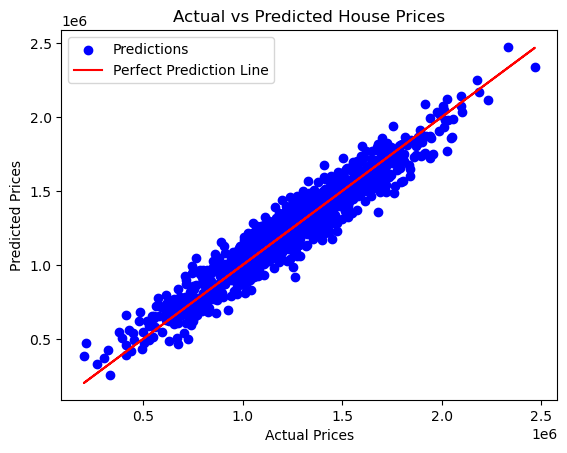

In [17]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


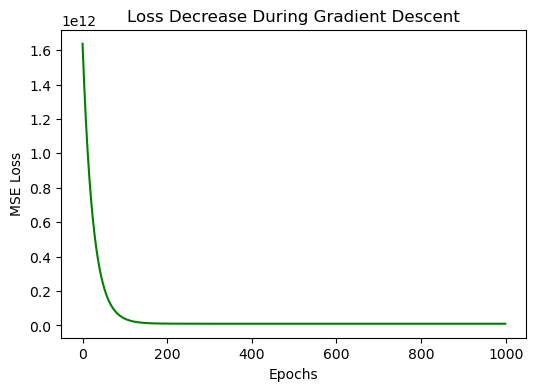

In [23]:
plt.figure(figsize=(6,4))
plt.plot(losses, color='green')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Decrease During Gradient Descent")
plt.show()